In [1]:
import numpy as np
import cv2
import PIL
from matplotlib import pyplot as plt

# Normal Image

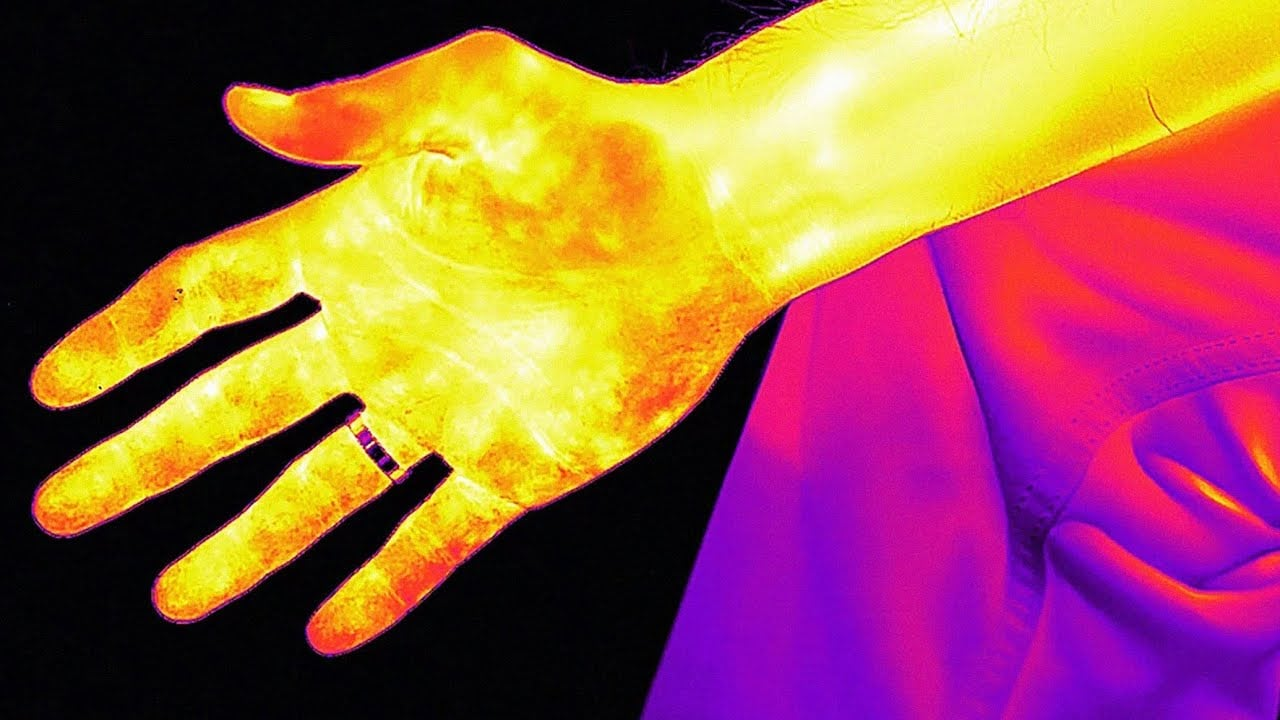

In [2]:
# img = PIL.Image.open('richard.jpg')
img = PIL.Image.open('thermal.jpg')

img

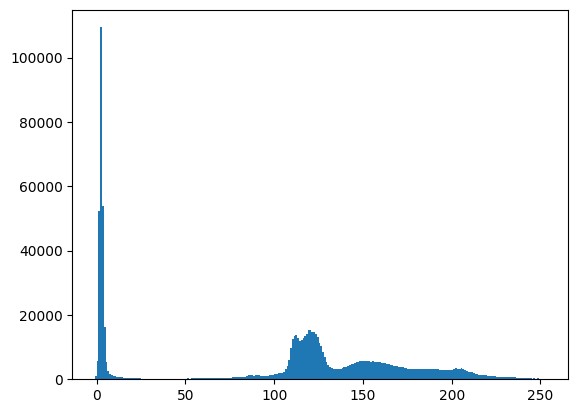

In [3]:
img = np.array(img)

# MEAN OF CHANNEL
vals = img.mean(axis=2).flatten()
count,bins = np.histogram(vals,range(255))
plt.bar(bins[:-1]-0.5,count,width=1,edgecolor='none')
plt.show()

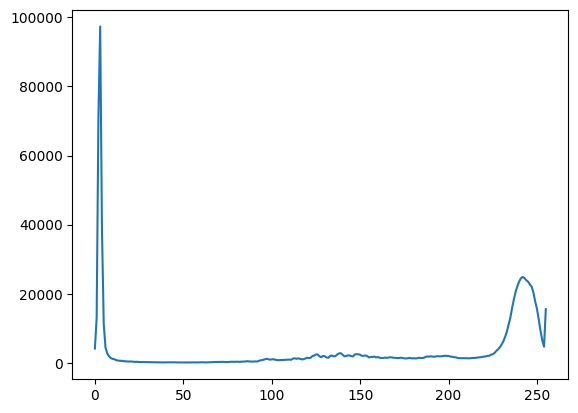

In [4]:
channel =0 #0,1,2
hist2 , bin_edge = np.histogram(img[:,:,channel].ravel(),bins=256,range=(0,256))
plt.plot(bin_edge[0:-1],hist2)
plt.show()

# Equalize Image

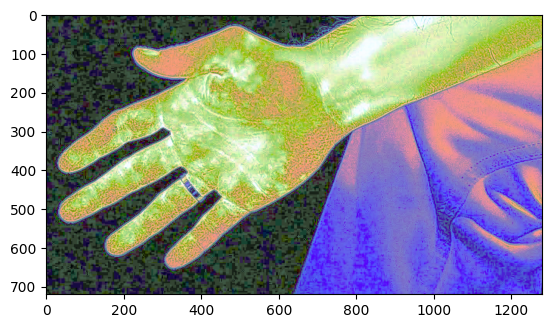

In [5]:
# img = cv2.imread('richard.jpg')

img = cv2.imread('thermal.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(img)
rgb_img =  cv2.merge((cv2.equalizeHist(r), cv2.equalizeHist(g), cv2.equalizeHist(b)))
plt.imshow(rgb_img,cmap=None)
plt.show()

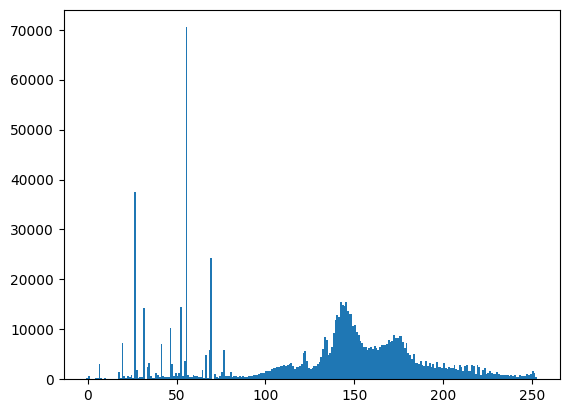

In [6]:
equalize_img_array = np.array(rgb_img)
vals = equalize_img_array.mean(axis=2).flatten()
count,bins = np.histogram(vals,range(255))
plt.bar(bins[:-1]-0.5,count,width=1,edgecolor='none')
plt.show()

# Normalize Image

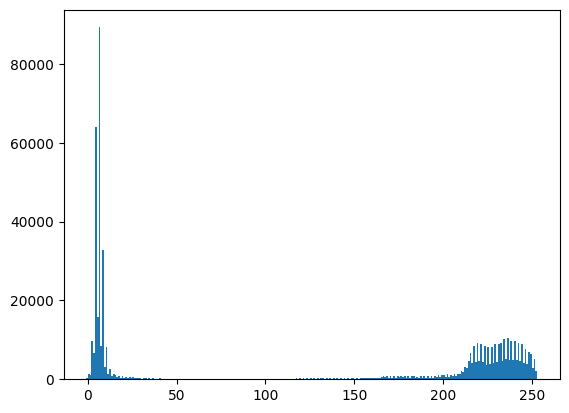

In [7]:
# img = PIL.Image.open('richard.jpg')

img = PIL.Image.open('thermal.jpg')
img = np.array(img)

def normalize(arr):
    """
    Linear normalization
    0-255 ---> 0-500
    """
    arr = arr.astype('float')
    # Do not touch the alpha channel
    for i in range(3):
        minval = arr[...,i].min()
        maxval = arr[...,i].max()
        # print(minval,maxval)
        if minval != maxval:
            arr[...,i] -= minval
            arr[...,i] *= (500.0/(maxval-minval))
    return arr


# MEAN OF CHANNEL
vals = normalize(img).mean(axis=2).flatten()
count,bins = np.histogram(vals,range(255))
plt.bar(bins[:-1]-0.5,count,width=1,edgecolor='none')
plt.show()

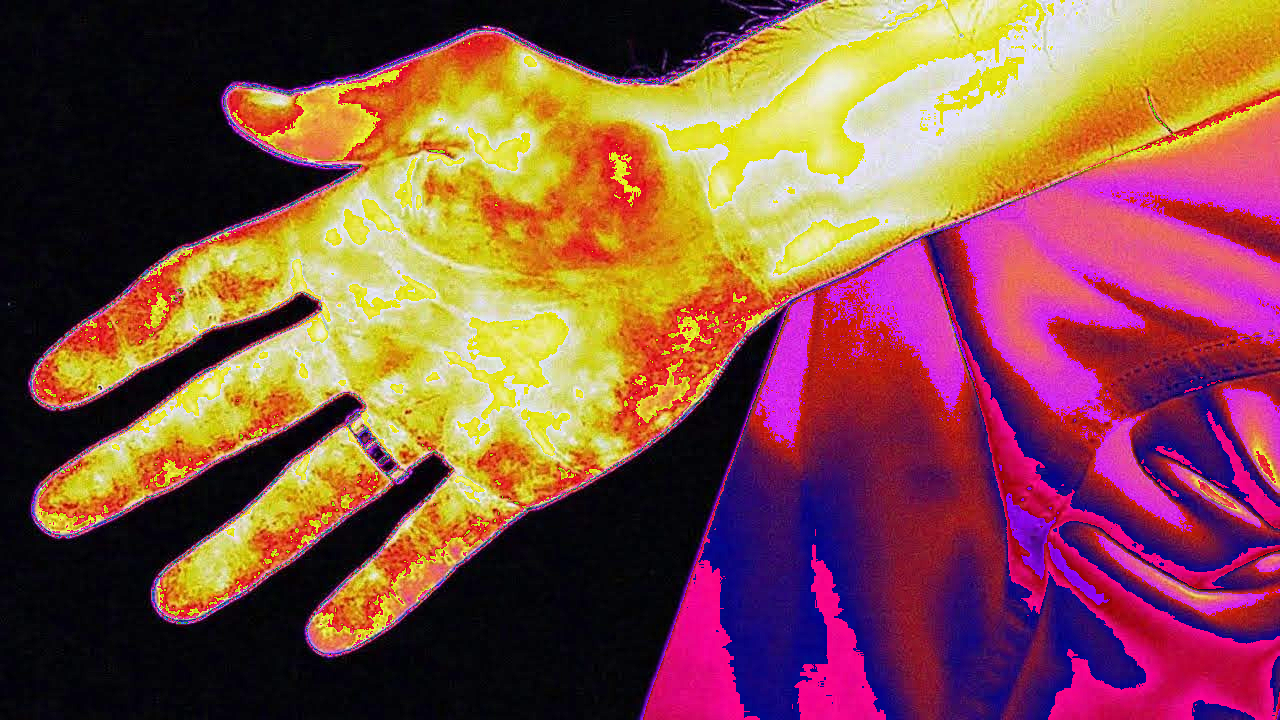

In [8]:
PIL.Image.fromarray(normalize(img).astype(np.uint8))